# Unit 6 Lecture 1 - Data Visualization

ESI4628: Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula, Mostafa Saeidi, Madeline Schiappa, Brett Belcher, and Nathalia Davila 
https://github.com/igaribay/DSSwithPython/blob/master/DSS-Week06/Notebook/DSS-Unit06-Lecture01.ipynb

## Notebook Learning Objectives
After studying this notebook students should be able to:
- Visualize Series and DataFrames
- Create various types of plots including: histograms, density, contour, scatter, and facets
- Visualize errors including error bars and confidence intervals.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def f(x,y):
    return np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]] [[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]
[[-0.83907153 -0.27536398  0.73559698  0.83067452]
 [-0.83907153  0.18037951  0.03525287 -0.8983655 ]
 [-0.83907153  0.63392454  0.32951726  0.9480757 ]]


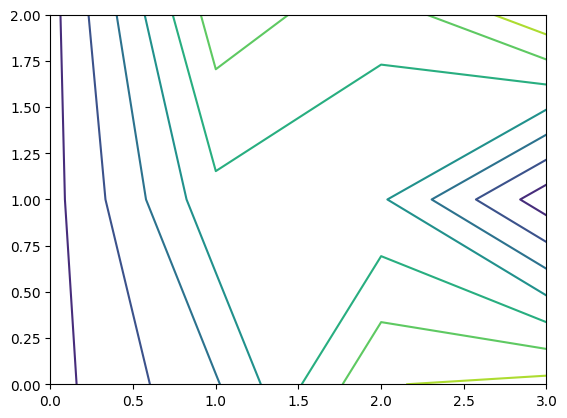

In [4]:
x = np.arange(0,4,1)
y = np.arange(0,3,1)
X , Y = np.meshgrid(x,y)
print(X,Y)
Z = f(X,Y)
print(Z)
plt.contour(Z)

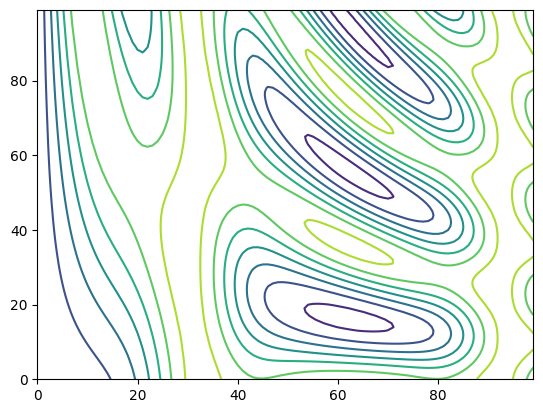

In [5]:
x = np.linspace(0,5,100)
y = np.linspace(0,5,100)
X , Y = np.meshgrid(x , y)
Z = f(X ,Y )

plt.contour(Z)

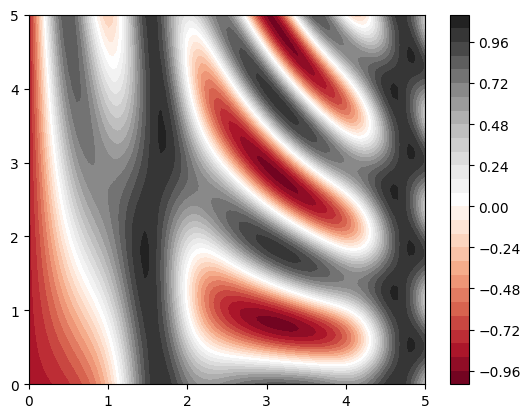

In [6]:
plt.contourf(X,Y,Z, 30, cmap = 'RdGy')
plt.colorbar()

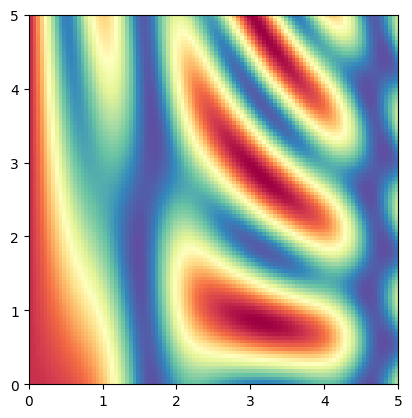

In [7]:
plt.imshow(Z, extent=[0,5,0,5], cmap='Spectral', origin='lower')

In [8]:
sns.set_theme(style='ticks', color_codes=True)

In [11]:
macro = pd.read_csv('../DSSwithPython-master\DSS-Week06\Data\macrodata.csv')
macro.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009,3,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [13]:
data = macro[['cpi','m1','tbilrate','unemp']]
data.tail()

,cpi,m1,tbilrate,unemp
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2
202,216.385,1673.9,0.12,9.6


fo more infor about log difference:
https://www.linkedin.com/pulse/measuring-change-log-differences-joseph-strell/

In [15]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Text(0.5, 1.0, 'Changes in log unemp and log unemp')

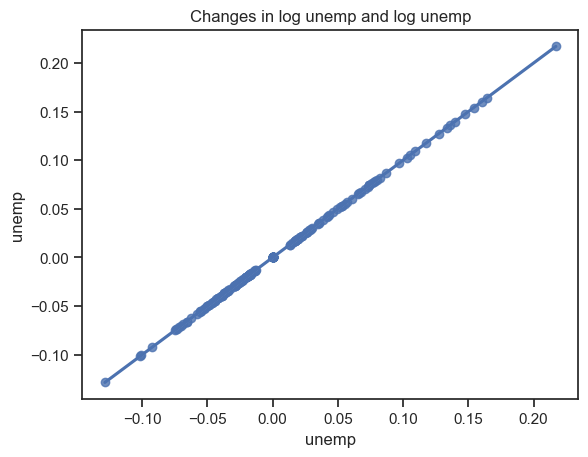

In [17]:
sns.regplot(x='unemp', y='unemp', data=trans_data)
plt.title('Changes in log %s and log %s'%('unemp','unemp'))

Text(0, 0.5, 'unemp')

<Figure size 640x480 with 0 Axes>

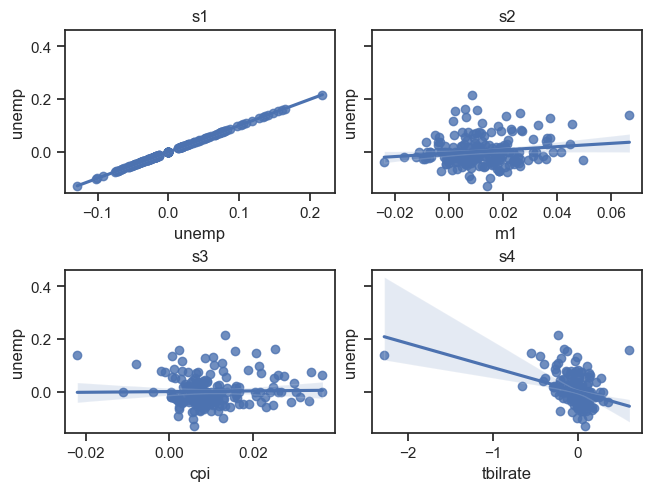

In [24]:
fig = plt.figure()
fig, axes1 = plt.subplots(2,2, sharey=True, layout='constrained')

sns.regplot(x='unemp', y='unemp', data=trans_data, ax= axes1[0,0])
sns.regplot(x='m1', y='unemp', data=trans_data, ax= axes1[0,1])
sns.regplot(x='cpi', y='unemp', data=trans_data, ax= axes1[1,0])
sns.regplot(x='tbilrate', y='unemp', data=trans_data, ax= axes1[1,1])

axes1[0,0].set_title('s1')
axes1[0,0].set_xlabel('unemp')
axes1[0,0].set_ylabel('unemp')

axes1[0,1].set_title('s2')
axes1[0,1].set_xlabel('m1')
axes1[0,1].set_ylabel('unemp')

axes1[1,0].set_title('s3')
axes1[1,0].set_xlabel('cpi')
axes1[1,0].set_ylabel('unemp')

axes1[1,1].set_title('s4')
axes1[1,1].set_xlabel('tbilrate')
axes1[1,1].set_ylabel('unemp')

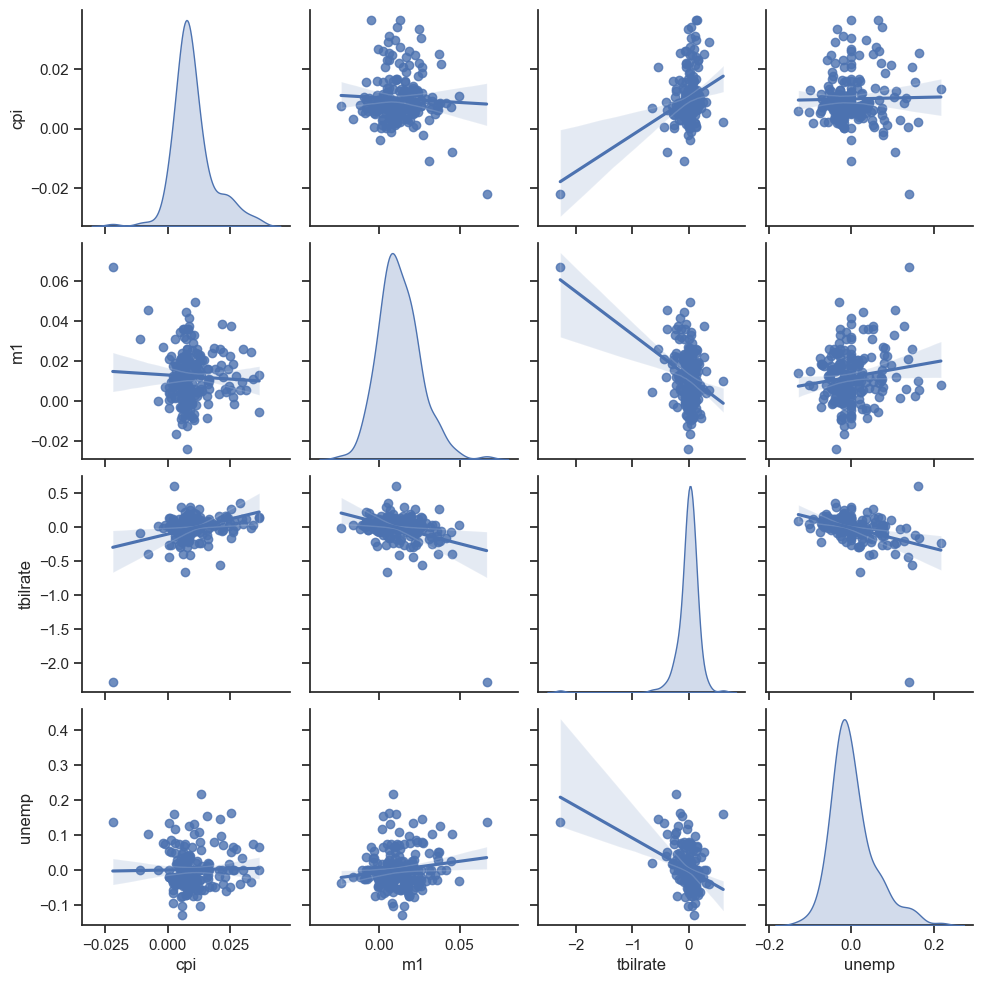

In [25]:
sns.pairplot(trans_data, diag_kind='kde', kind='reg')

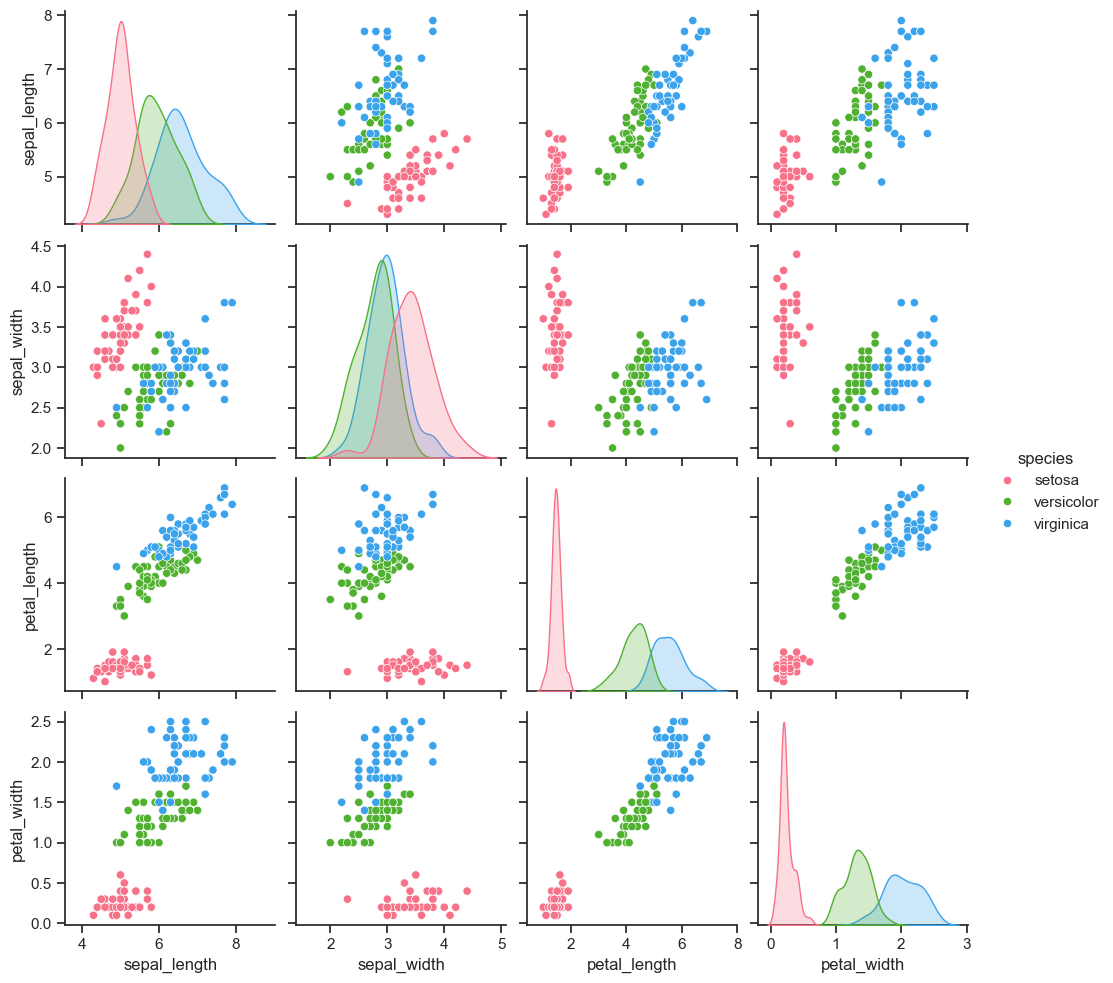

In [26]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', palette='husl')

In [27]:
tips = pd.read_csv('../DSSwithPython-master/DSS-Week06/Data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


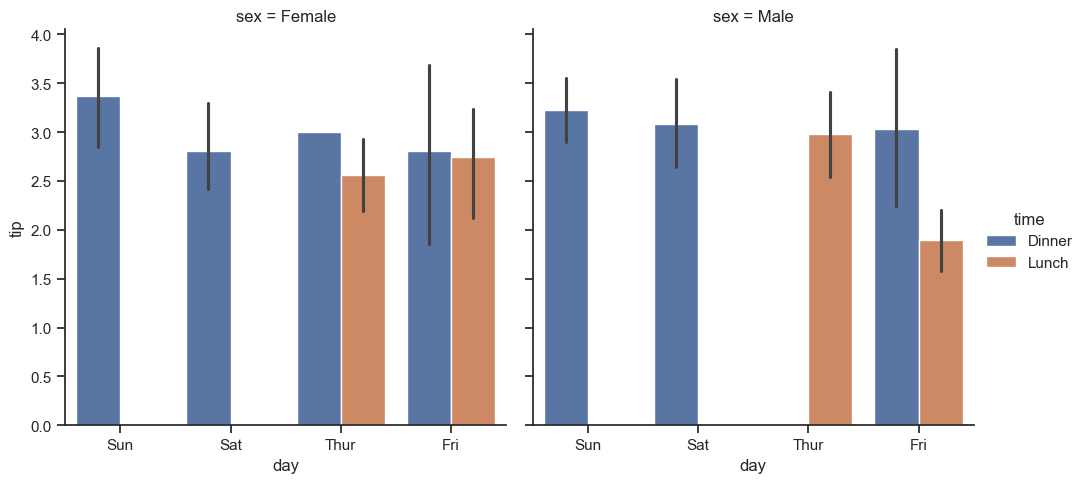

In [28]:
sns.catplot(x='day' , y='tip', hue='time', col='sex', kind='bar', data=tips)

C:\Users\acer\AppData\Local\Temp\ipykernel_16856\38773532.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='day', y='tip', col='sex', row='time',data=tips, kind='bar', palette='pastel')


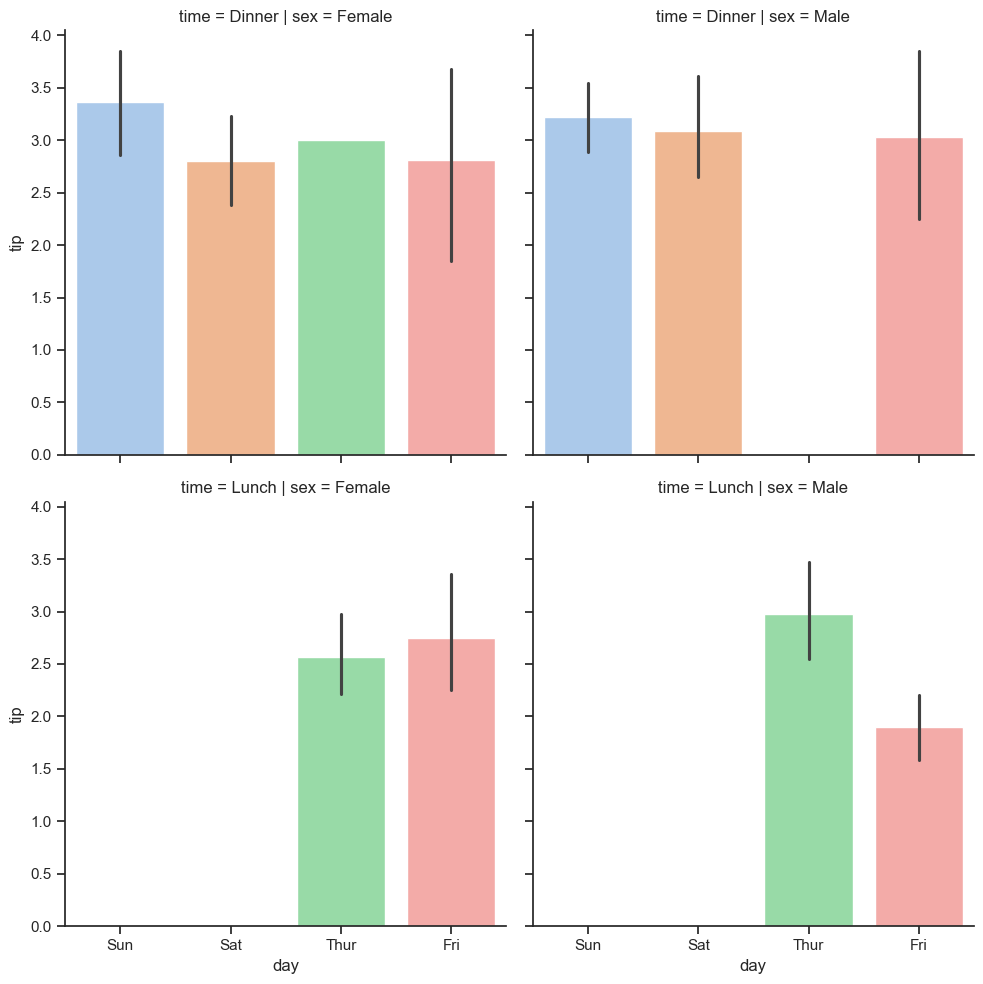

In [38]:
sns.catplot(x='day', y='tip', col='sex', row='time',data=tips, kind='bar', palette='pastel')

C:\Users\acer\AppData\Local\Temp\ipykernel_16856\3990041725.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='tip', y='day', kind='box', data=tips[tips.tip<6], palette='pastel')


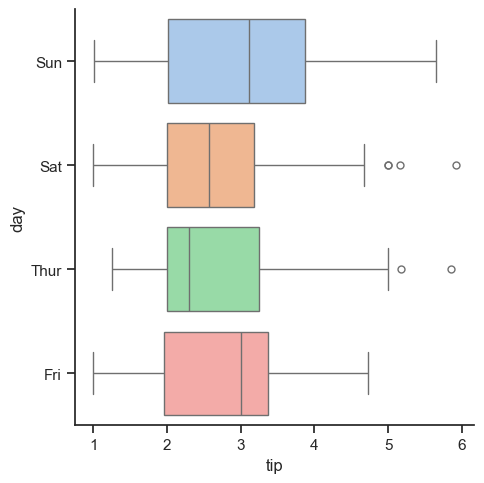

In [45]:
sns.catplot(x='tip', y='day', kind='box', data=tips[tips.tip<6], palette='pastel')

<ErrorbarContainer object of 3 artists>

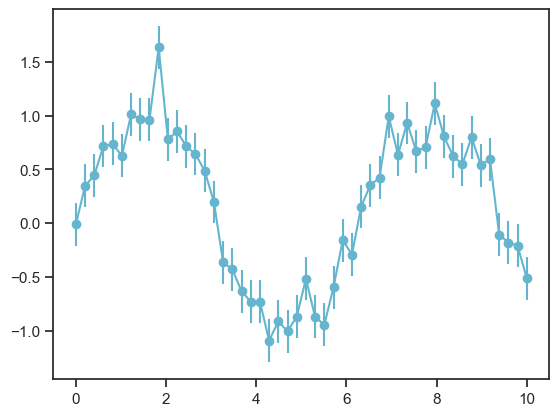

In [48]:
x= np.linspace(0,10,50)
dy = 0.2
y = np.sin(x) + dy*np.random.randn(50)

plt.errorbar(x,y, yerr=dy, fmt = 'co-')

<ErrorbarContainer object of 3 artists>

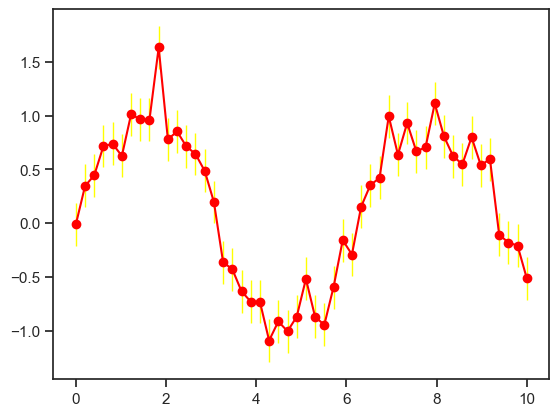

In [52]:
plt.errorbar(x,y, yerr=dy, fmt='-o', color='red', ecolor='yellow', elinewidth=1, capsize=0)

In [54]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [63]:
rng = np.random.RandomState(0)
x = rng.uniform(0, 5, 20)[:,np.newaxis]
y = 0.5 * np.sin(3*x) + rng.normal(0,0.5,x.shape[0])


In [62]:
plt.figure(0)
kernel = 1.0 * RB